In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import xgboost as xgb

path1 = r'C:\code\python\EV\data\train_v1'
path2 = r'C:\code\python\EV\test\result.csv'

In [2]:
name = os.listdir(path1)
name

['CL20.csv', 'CL21.csv', 'CL22.csv', 'CL23.csv', 'CL24.csv']

In [3]:
def diff_mile(data):
    min_mile = min(data)
    li = [i - min_mile for i in data]
    return li

In [4]:
data = pd.read_csv(path1 + '\\' + 'CL20.csv')[['start', 'mile', 'energy']]
data['id'] = 'CL20'
data

,start,mile,energy,id
0,2022-04-01 03:59:58,323236.0,64.695556,CL20
1,2022-04-02 03:44:18,323630.5,62.216667,CL20
2,2022-04-02 15:28:28,323813.3,63.151111,CL20
3,2022-04-04 18:26:08,324193.1,60.916111,CL20
4,2022-04-08 04:15:48,324857.0,56.300000,CL20
...,...,...,...,...
197,2022-09-28 02:58:18,387214.6,55.497222,CL20
198,2022-09-29 03:22:08,387614.9,54.537222,CL20
199,2022-09-29 15:12:48,387814.0,58.926667,CL20
200,2022-09-30 04:11:28,388003.9,55.340556,CL20


In [5]:
data1 = pd.read_csv(path2)
new_columns = ['id', 'start', 'mile', 'energy']
data1.columns = new_columns
data1 = data1[data1.id == 'CL20']
data1

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 0: invalid start byte

In [6]:
all_data = pd.concat([data, data1], axis=0)
pd.to_datetime(all_data['start'])

NameError: name 'data1' is not defined

In [7]:
def add_fea(new_path, path2, name):
    data = pd.read_csv(new_path + '\\' + name+'.csv')
    data['id'] = name
    data = data[data.ratio == 1][['id', 'start', 'mile', 'energy']]
    data1 = pd.read_csv(path2)
    new_columns = ['id', 'start', 'mile', 'energy']
    data1.columns = new_columns
    data1 = data1[data1.id == name]
    data = pd.concat([data, data1], axis=0)
    time = pd.to_datetime(data.start)
    data['year'] = time.dt.year
    data['month'] = time.dt.month
    data['day'] = time.dt.day
    data['hour'] = time.dt.hour
    data['minute'] = time.dt.minute
    mile_diff = diff_mile(data['mile'])
    data['mile_diff1'] = mile_diff
    choose_columns = ['year', 'month', 'day', 'hour', 'minute', 'mile_diff1', 'energy']
    data = data[choose_columns]
    return data

In [8]:
add_fea(path1,path2, 'CL20').iloc[:,:6]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 0: invalid start byte

In [9]:
def Score(y, y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    print(y)
    print(y_hat)
    k = len(y)
    return sum(1 - abs(y - y_hat) / y) / k

In [10]:
import numpy as np

y = np.array([10, 10, 10])
y_hat = np.array([2, 3, 4])
score(y, y_hat)

NameError: name 'score' is not defined

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

params = {
    'learning_rate': 0.05,
    'max_depth': 5,
    'n_estimators': 100,
    'metric':Score
}
xgb.set_config(verbosity=0)  # 设置为 0 可以禁用日志输出
model = xgb.XGBRegressor(**params)

all_data = add_fea(path1,path2, 'CL24')
X_train = all_data[:-3].iloc[:,:6]
y_train = all_data[:-3]['energy']
X_test = all_data[-3:].iloc[:,:6]
# # 拟合模型
model.fit(X_train, y_train)
ans = model.predict(X_train)
res = pd.DataFrame()
res['y'] = y_train
res['y_pred'] = ans
print(res)
# # 进行预测
y_pred = model.predict(X_test)
y_pred

             y     y_pred
0    55.533333  55.348995
1    62.810000  60.770340
2    55.512778  55.003716
3    55.453333  55.653347
4    56.226111  57.628326
..         ...        ...
132  58.218889  58.929974
133  59.875000  59.606285
134  56.855000  56.371990
135  63.012778  61.402523
136  54.653889  54.296272

[132 rows x 2 columns]


array([58.41355 , 54.044834, 60.871452], dtype=float32)

In [19]:
df = pd.read_csv(path1 + '\CL22' + '.csv')
df = df[df.ratio == 1]
df

,start,end,ratio,mile,energy
0,2022-04-02 06:07:18,2022-04-02 06:53:38,1.0,349778.3,61.355000
1,2022-04-02 20:22:28,2022-04-02 21:07:28,1.0,350022.8,57.070000
2,2022-04-03 19:56:28,2022-04-03 20:40:48,1.0,350245.9,56.601111
3,2022-04-04 19:51:08,2022-04-04 20:36:08,1.0,350483.7,57.370000
4,2022-04-05 19:40:28,2022-04-05 20:26:08,1.0,350702.4,58.297778
...,...,...,...,...,...
135,2022-09-23 19:20:18,2022-09-23 20:06:38,1.0,384727.3,57.167778
136,2022-09-24 21:09:58,2022-09-24 21:56:58,1.0,384949.6,58.521111
137,2022-09-26 19:15:38,2022-09-26 20:02:18,1.0,385099.1,59.654444
138,2022-09-27 19:28:18,2022-09-27 20:14:58,1.0,385314.1,57.796111


59.34961403508772
60.007295081967214
58.219182769726245
59.51644578313254
58.63441919191919


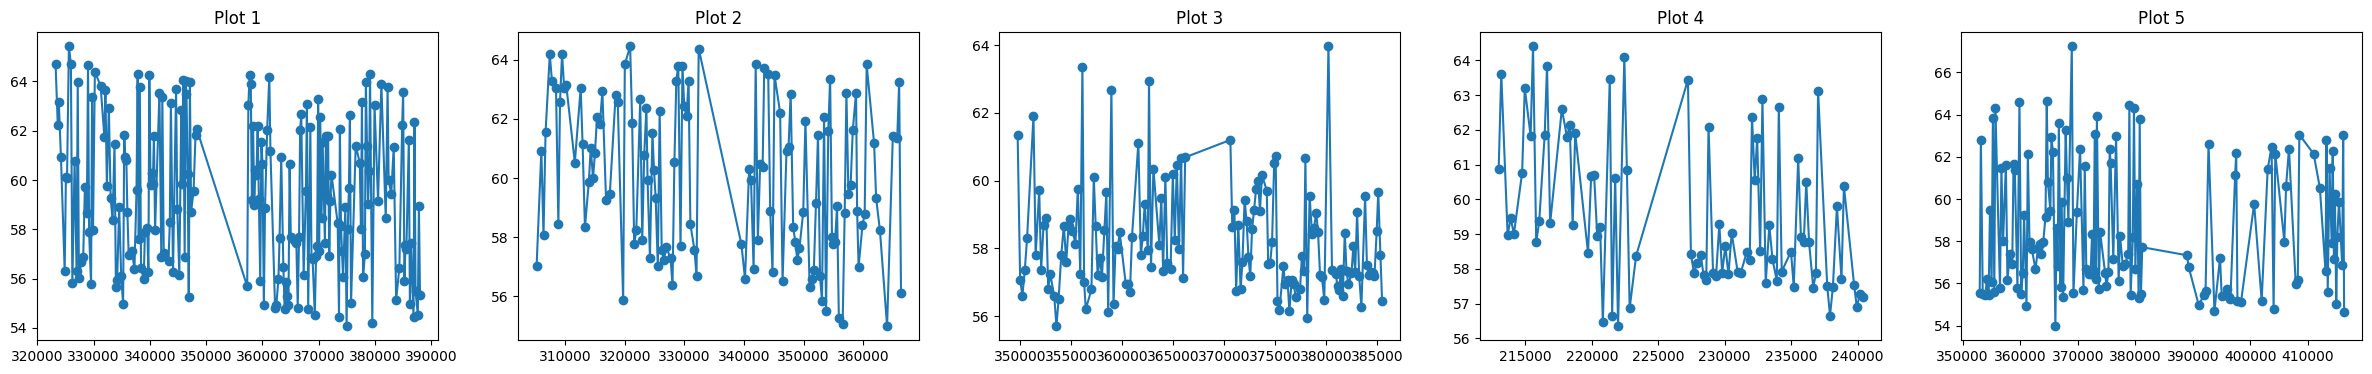

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(30, 4))

# 绘制图像
for i, ax in enumerate(axes.flatten()):
    df = pd.read_csv(path1 + '\CL2' + f'{i}' + '.csv')
    df = df[df.ratio == 1]

    print(df['energy'].mean())
    # print(df)
    ax.plot(df['mile'], df['energy'],marker='o')
    ax.set_title(f"Plot {i + 1}")